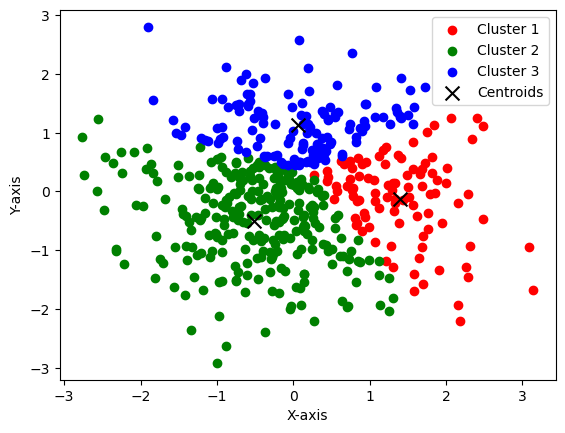

In [12]:
import torch
import random
import matplotlib.pyplot as plt

# Generate some random data points
data = torch.randn(500, 2)

# Number of clusters (K)
K = 3

# Initialize K cluster centroids randomly
centroids = data[random.sample(range(len(data)), K)]

# Number of iterations
num_iterations = 1

# K-Means algorithm
for _ in range(num_iterations):
    # Calculate distances between data points and centroids
    distances = torch.cdist(data, centroids)

    # Assign each data point to the nearest centroid
    cluster_assignment = torch.argmin(distances, dim=1)
    # print(cluster_assignment)

    # Update centroids by taking the mean of assigned data points
    for k in range(K):
        cluster_points = data[cluster_assignment == k]
        if len(cluster_points) > 0:
            centroids[k] = torch.mean(cluster_points, dim=0)

# Visualize the results
colors = ['r', 'g', 'b']
for k in range(K):
    cluster_points = data[cluster_assignment == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], label=f'Cluster {k+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='x', s=100, label='Centroids')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()
